# Trabajo de Aprendizaje No Supervisado


# Punto 3

- Buscar un **dataset adicional** para aplicar otras técnicas de **aprendizaje no supervisado**, tales como:
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
  - **Gaussian Mixtures (Modelos de Mezclas Gaussianas)**

## DBSCAN

Dataset sintético generado: (600, 2)
Clases reales: 6


Text(0, 0.5, 'Feature 2')

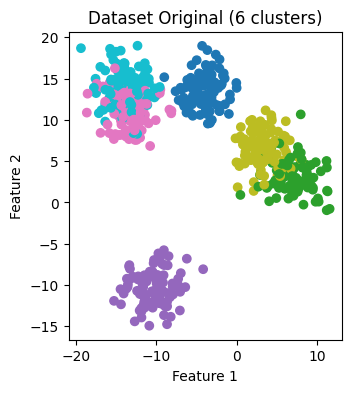

In [87]:
# Punto 3: DBSCAN y Gaussian Mixtures
# Dataset sintético para demostrar técnicas adicionales de clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Generar dataset sintético con 6 grupos más complejos
X_synthetic, y_true = make_blobs(n_samples=600, centers=6, cluster_std=2.0, 
                                center_box=(-15, 15), random_state=42)

print(f"Dataset sintético generado: {X_synthetic.shape}")
print(f"Clases reales: {len(np.unique(y_true))}")

# Visualizar datos originales
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_true, cmap='tab10')
plt.title('Dataset Original (6 clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

DBSCAN encontró 2 clusters
Puntos de ruido: 0


Text(0, 0.5, 'Feature 2')

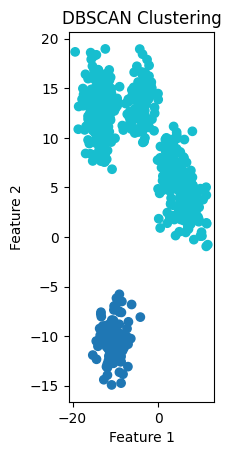

In [88]:
# DBSCAN Clustering
X_scaled = StandardScaler().fit_transform(X_synthetic)

# Aplicar DBSCAN con parámetros ajustados para más clusters
dbscan = DBSCAN(eps=0.4, min_samples=8)
labels_dbscan = dbscan.fit_predict(X_scaled)

print(f"DBSCAN encontró {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)} clusters")
print(f"Puntos de ruido: {list(labels_dbscan).count(-1)}")

# Visualizar resultados DBSCAN
plt.subplot(132)
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=labels_dbscan, cmap='tab10', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Gaussian Mixure Models

Gaussian Mixtures con 6 componentes
Log-likelihood: -5.70


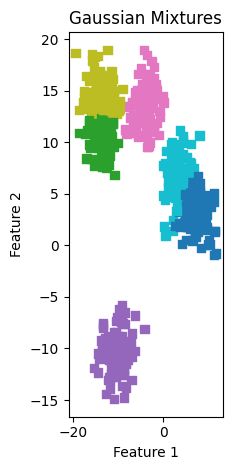

In [89]:
# Gaussian Mixture Models
gmm = GaussianMixture(n_components=6, random_state=42)
labels_gmm = gmm.fit_predict(X_synthetic)

print(f"Gaussian Mixtures con {gmm.n_components} componentes")
print(f"Log-likelihood: {gmm.score(X_synthetic):.2f}")

# Visualizar resultados Gaussian Mixtures  
plt.subplot(133)
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=labels_gmm, cmap='tab10', marker='s')
plt.title('Gaussian Mixtures')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [90]:
# Comparación de métrics de clustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Calcular métricas para cada método (excluyendo ruido en DBSCAN)
mask_no_noise = labels_dbscan != -1

print("Comparación de técnicas de clustering:")
print(f"Dataset: {X_synthetic.shape[0]} muestras, {X_synthetic.shape[1]} características")

# Adjusted Rand Index (comparar con labels verdaderas)
ari_dbscan = adjusted_rand_score(y_true[mask_no_noise], labels_dbscan[mask_no_noise])
ari_gmm = adjusted_rand_score(y_true, labels_gmm)

print(f"\nAdjusted Rand Index (mayor es mejor):")
print(f"DBSCAN: {ari_dbscan:.3f}")
print(f"Gaussian Mixtures: {ari_gmm:.3f}")

# Silhouette Score
sil_dbscan = silhouette_score(X_synthetic[mask_no_noise], labels_dbscan[mask_no_noise])
sil_gmm = silhouette_score(X_synthetic, labels_gmm)

print(f"\nSilhouette Score (mayor es mejor):")
print(f"DBSCAN: {sil_dbscan:.3f}")
print(f"Gaussian Mixtures: {sil_gmm:.3f}")

print(f"\nCaracterísticas de cada método:")
print(f"DBSCAN: Detecta formas arbitrarias y ruido")
print(f"Gaussian Mixtures: Asume distribuciones gaussianas")

Comparación de técnicas de clustering:
Dataset: 600 muestras, 2 características

Adjusted Rand Index (mayor es mejor):
DBSCAN: 0.142
Gaussian Mixtures: 0.764

Silhouette Score (mayor es mejor):
DBSCAN: 0.544
Gaussian Mixtures: 0.521

Características de cada método:
DBSCAN: Detecta formas arbitrarias y ruido
Gaussian Mixtures: Asume distribuciones gaussianas


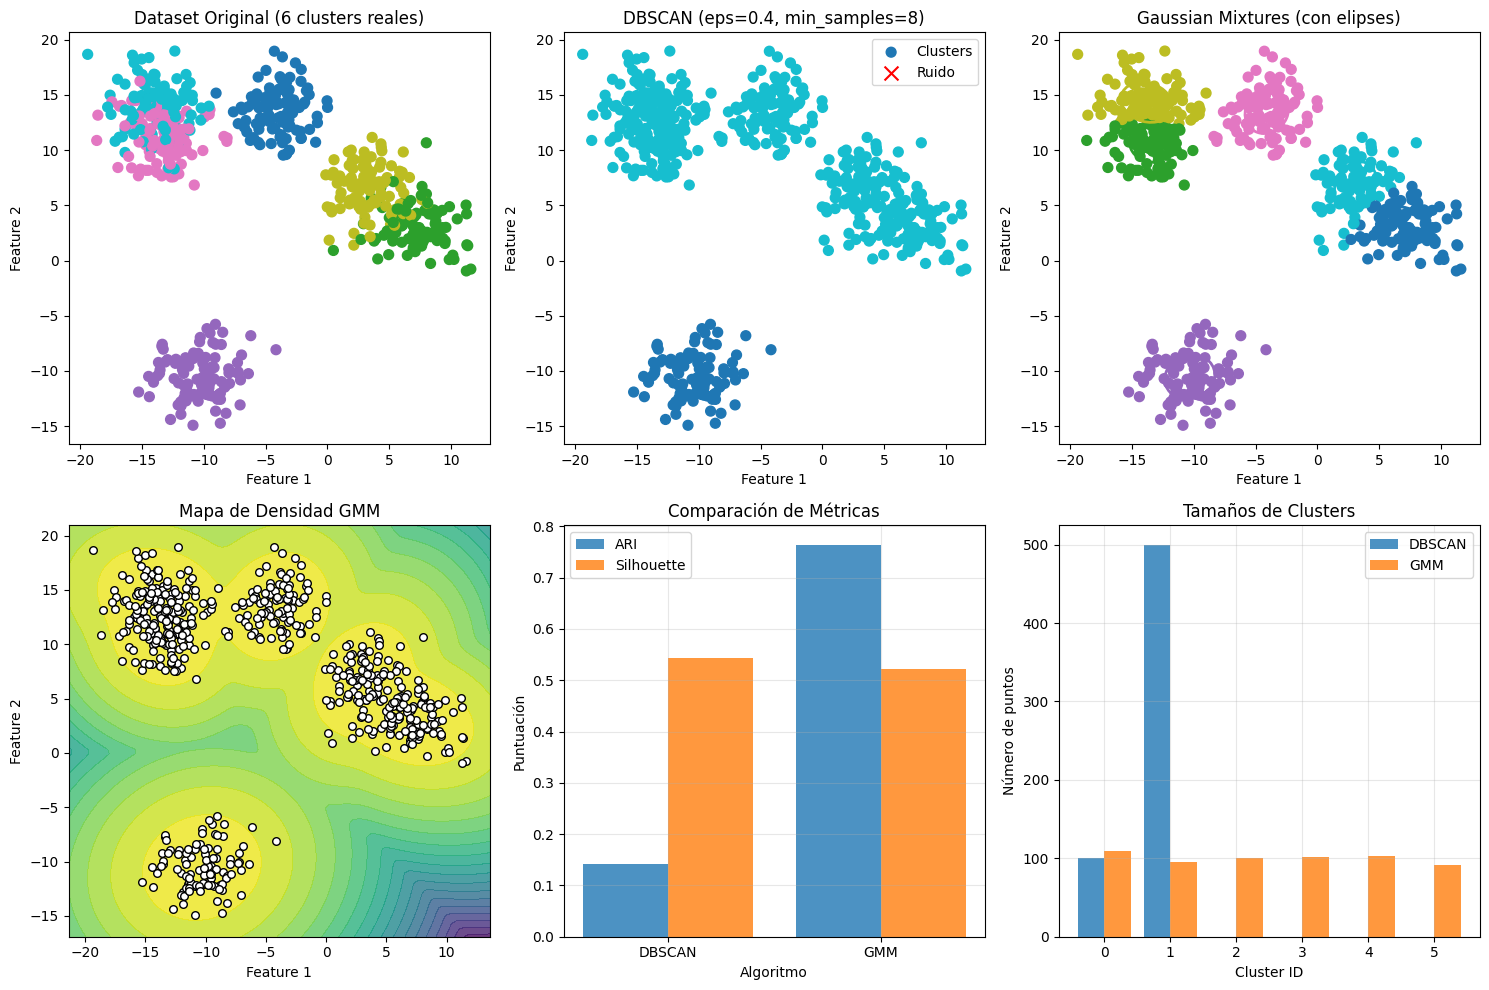

RESULTADOS:
DBSCAN: 2 clusters + 0 ruido
GMM: 6 componentes, convergió en 4 iteraciones
Mejor método (ARI): GMM


In [91]:
# Visualización detallada del funcionamiento de los algoritmos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Fila 1: Datos originales y resultados
axes[0, 0].scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_true, cmap='tab10', s=50)
axes[0, 0].set_title('Dataset Original (6 clusters reales)')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')

# DBSCAN con puntos de ruido marcados
noise_mask = labels_dbscan == -1
axes[0, 1].scatter(X_synthetic[~noise_mask, 0], X_synthetic[~noise_mask, 1], 
                   c=labels_dbscan[~noise_mask], cmap='tab10', s=50, label='Clusters')
axes[0, 1].scatter(X_synthetic[noise_mask, 0], X_synthetic[noise_mask, 1], 
                   c='red', marker='x', s=100, label='Ruido')
axes[0, 1].set_title(f'DBSCAN (eps=0.4, min_samples=8)')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].legend()

# Gaussian Mixtures con elipses de confianza
axes[0, 2].scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=labels_gmm, cmap='tab10', s=50)
# Dibujar elipses de confianza para cada componente
from matplotlib.patches import Ellipse
colors = plt.cm.tab10(np.linspace(0, 1, gmm.n_components))
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    covar = gmm.covariances_[i]
    v, w = np.linalg.eigh(covar)
    angle = np.degrees(np.arctan2(w[1, 0], w[0, 0]))
    ellipse = Ellipse(mean, 2*np.sqrt(v[0]), 2*np.sqrt(v[1]), angle=angle, 
                     fill=False, color=colors[i], linewidth=2)
    axes[0, 2].add_patch(ellipse)
axes[0, 2].set_title('Gaussian Mixtures (con elipses)')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')

# Fila 2: Mapas de probabilidad y densidad
# Crear grid para mapas de calor
x_min, x_max = X_synthetic[:, 0].min() - 2, X_synthetic[:, 0].max() + 2
y_min, y_max = X_synthetic[:, 1].min() - 2, X_synthetic[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Mapa de probabilidades de GMM
Z_prob = gmm.score_samples(grid_points).reshape(xx.shape)
axes[1, 0].contourf(xx, yy, Z_prob, levels=20, cmap='viridis', alpha=0.8)
axes[1, 0].scatter(X_synthetic[:, 0], X_synthetic[:, 1], c='white', s=30, edgecolors='black')
axes[1, 0].set_title('Mapa de Densidad GMM')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Comparación de métricas
metrics_names = ['DBSCAN', 'GMM']
ari_scores = [ari_dbscan, ari_gmm]
sil_scores = [sil_dbscan, sil_gmm]

x_pos = np.arange(len(metrics_names))
axes[1, 1].bar(x_pos - 0.2, ari_scores, 0.4, label='ARI', alpha=0.8)
axes[1, 1].bar(x_pos + 0.2, sil_scores, 0.4, label='Silhouette', alpha=0.8)
axes[1, 1].set_xlabel('Algoritmo')
axes[1, 1].set_ylabel('Puntuación')
axes[1, 1].set_title('Comparación de Métricas')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Distribución de tamaños de clusters
unique_dbscan, counts_dbscan = np.unique(labels_dbscan[labels_dbscan != -1], return_counts=True)
unique_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)

axes[1, 2].bar(unique_dbscan - 0.2, counts_dbscan, 0.4, label='DBSCAN', alpha=0.8)
axes[1, 2].bar(unique_gmm + 0.2, counts_gmm, 0.4, label='GMM', alpha=0.8)
axes[1, 2].set_xlabel('Cluster ID')
axes[1, 2].set_ylabel('Número de puntos')
axes[1, 2].set_title('Tamaños de Clusters')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen técnico conciso
print("RESULTADOS:")
print(f"DBSCAN: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)} clusters + {list(labels_dbscan).count(-1)} ruido")
print(f"GMM: {gmm.n_components} componentes, convergió en {gmm.n_iter_} iteraciones")
print(f"Mejor método (ARI): {'DBSCAN' if ari_dbscan > ari_gmm else 'GMM'}")